In [1]:
pip install autoeis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 155.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 MB 140.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 101.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.3.5 which is incompatible.
nomad-lab 1.4.0 requires requests<2.32.0,>=2.27.1, but you have requests 2.32.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install impedance
import importlib
import Manuel_echem_function
importlib.reload(Manuel_echem_function)
from Manuel_echem_function import *
import pandas as pd
import os, io
import requests
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
from nomad_api_calls import *

%matplotlib widget

import warnings
warnings.filterwarnings("ignore")

## Plotting preferences 

color_cm = ["#004f84ff", "#6cabe9ff", "#d15e57ff", "#ff7f2aff","#808080ff","#8787deff"]
# Expanded with 5 additional colors that harmonize with the original palette
color_cm = color_cm + ["#00a591ff", "#b2df8aff", "#f9c74fff", "#178eaeff", "#a70d88ff", "#373438ff",]


matplotlib.rc('font', size= 14) # controls default text sizes
matplotlib.rc('axes', titlesize=14) # fontsize of the axes title
matplotlib.rc('axes', labelsize=14) # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=14) # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=14) # fontsize of the tick labels
matplotlib.rc('legend', fontsize= 10) # legend fontsize
matplotlib.rc('figure', titlesize=14) # fontsize of the figure title

url = "https://nomad-hzb-se.de/nomad-oasis/api/v1"
token = os.environ['NOMAD_CLIENT_ACCESS_TOKEN'] 
if len(token) > 10:
    print("Token Recieved")

/opt/conda/lib/python3.12/pty.py:95: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Token Recieved


0


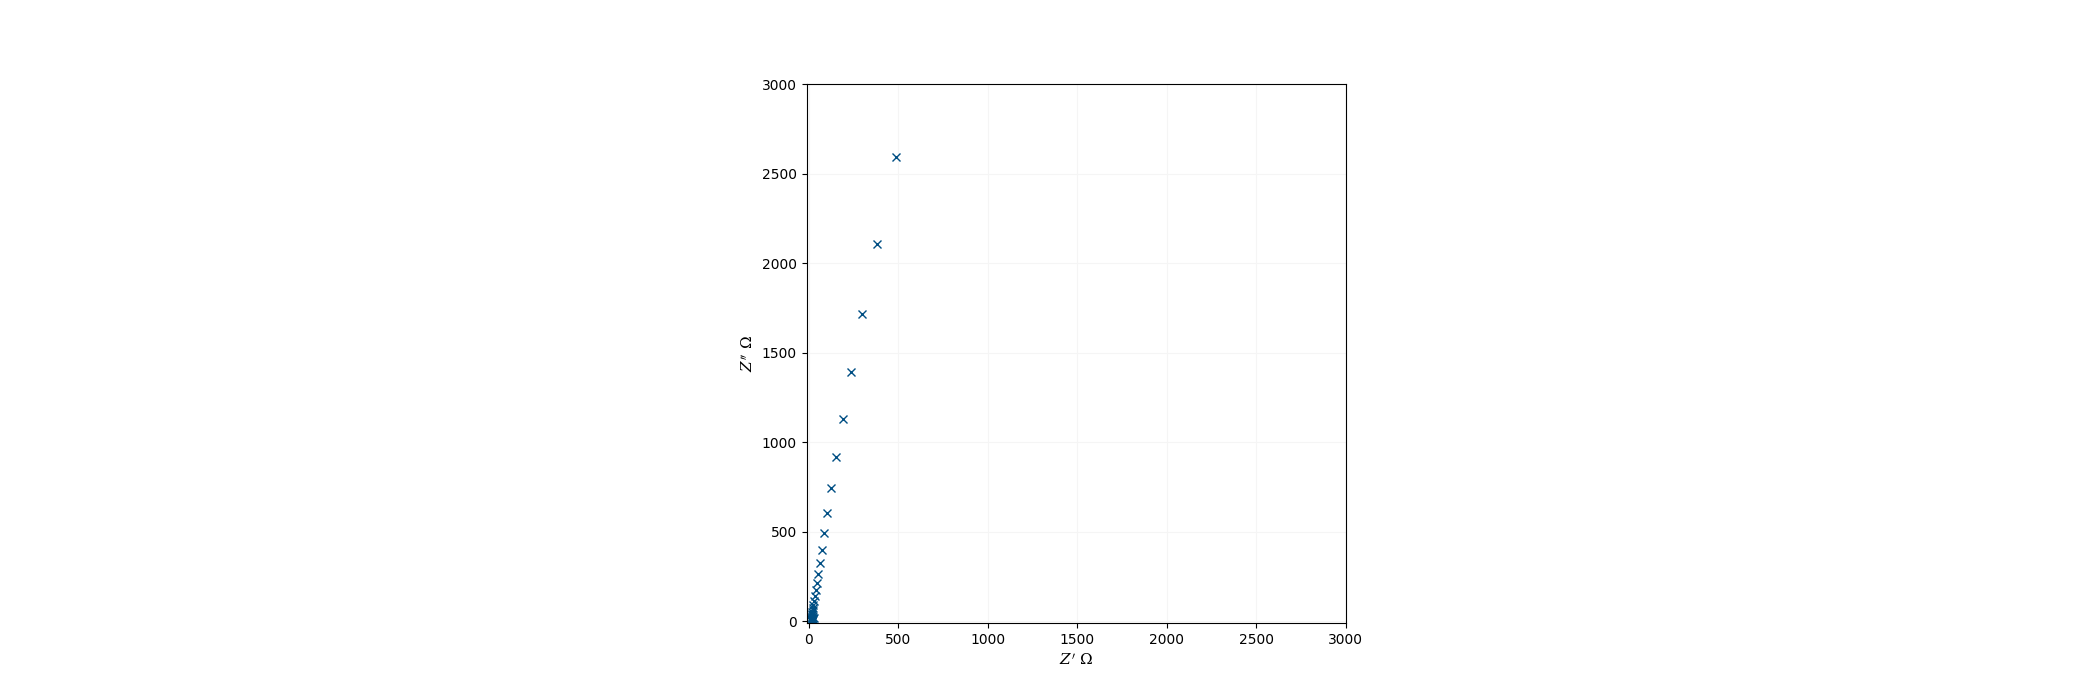

In [22]:
plt.close("all")
file_id=[["HZB_Echem_161_1_C-10"]]

fig,axis=plt.subplots(figsize=(7*3, 7))

reference_values=[0.05,0.1,0.2,0.3,0.5]  # Set of scan speed
threshold=0.02
scan_speed=1       # From the reference_values
cycle_number=1


for jj,subbatch in enumerate(file_id):
    
    color=color_cm[jj]
    print(jj)
    for ii,file in enumerate(subbatch):

        ## EIS plot
        axs=axis
        data = get_specific_data_of_sample(url, token, file, "HySprint_ElectrochemicalImpedanceSpectroscopy")
        axs.plot(data[0]["z_real"],data[0]["z_imaginary"],"x",color=color)

        freq = np.array(data[0]["frequency"], dtype=float)
        Zr   = np.array(data[0]["z_real"], dtype=float)
        Zi   = -np.array(data[0]["z_imaginary"], dtype=float)
        
        Z = Zr + 1j * Zi
        
        axs.set_aspect('equal')
        axs.set_xlabel(r"$Z'$ $\Omega$")
        axs.set_ylabel(r"$Z''$ $\Omega$")
        axs.set_xlim([-10,3000])
        axs.set_ylim([-10,3000])   
        axs.legend()

plt.show()


In [37]:


import matplotlib.pyplot as plt

import autoeis as ae
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import numpyro
import seaborn as sns
from IPython.display import display

import autoeis as ae

ae.visualization.set_plot_style()

# Set this to True if you're running the notebook locally
interactive = True
ae.visualization.set_plot_style()
     


In [25]:
#freq, Z = ae.io.load_test_dataset(preprocess=True)

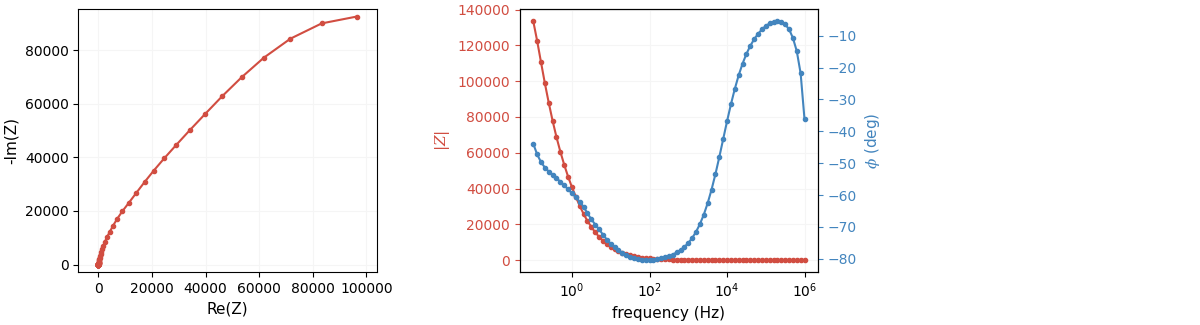

In [24]:
ae.visualization.plot_impedance_combo(freq, Z);

[10:36:46] WARNING  11% of data filtered out.                                   


<Axes: title={'center': 'Lin-KK validation'}, xlabel='frequency (Hz)', ylabel='delta %'>

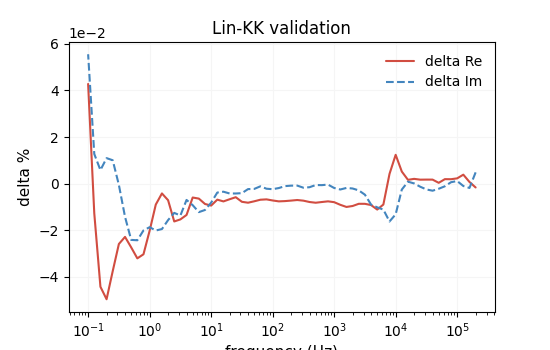

In [26]:

freq, Z, aux = ae.utils.preprocess_impedance_data(freq, Z, tol_linKK=5e-2, return_aux=True)

# NOTE: Since linKK could change `freq`, you should use `aux.freq` to plot the residuals
ae.visualization.plot_linKK_residuals(aux.freq, aux.res.real, aux.res.imag)



In [40]:
use_pregenerated_circuits = False

if use_pregenerated_circuits:
    circuits_unfiltered = ae.io.load_test_circuits()
else:
    kwargs = {
        "iters": 36,
        "complexity": 20,
        "population_size": 100,
        "generations": 30,
        "terminals": "RLP",
        "tol": 1e-2,
        "parallel": True
    }
    circuits_unfiltered = ae.core.generate_equivalent_circuits(freq, Z, **kwargs)
    # Since generating circuits is expensive, let's save the results to a CSV file
    circuits_unfiltered.to_csv("circuits_unfiltered.csv", index=False)
    # To load from file, uncomment the next 2 lines (line 2 is to convert str -> Python objects)
    # circuits_unfiltered = pd.read_csv("circuits_unfiltered.csv")
    # circuits_unfiltered["Parameters"] = circuits_unfiltered["Parameters"].apply(eval)

circuits_unfiltered



Generating Candidate ECMs:   0%|          | 0/36 [00:00<?, ?it/s]

,circuitstring,Parameters
0,"R1-[P2,R3]","{'R1': 0.0628904686858473, 'P2w': 4.2237703569..."
1,"[R1,P2-[R3,L4]-[P5,R6]]","{'R1': 344573.20383408497, 'P2w': 1000000000.0..."
2,"[[L1-R2,L3-R4],P5]-R6","{'L1': 0.14393019752109723, 'R2': 163492.14320..."


In [32]:
circuits = ae.core.filter_implausible_circuits(circuits_unfiltered)
# Let's save the filtered circuits to a CSV file as well
circuits.to_csv("circuits_filtered.csv", index=False)
# To load from file, uncomment the next 2 lines (line 2 is to convert str -> Python objects)
# circuits = pd.read_csv("circuits_filtered.csv")
# circuits["Parameters"] = circuits["Parameters"].apply(eval)
circuits["Parameters"].values

array([{'R1': 1000000000.0, 'P2w': 4.1469860283076745e-06, 'P2n': 0.8729924261577819, 'R3': 152096.72364120136, 'R4': 16.024408363214125}],
      dtype=object)

In [33]:
results = ae.core.perform_bayesian_inference(circuits, freq, Z)

Refining Initial Guess:   0%|          | 0/1 [00:00<?, ?it/s]

Running Bayesian Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
for result in results:
    if result.converged:
        ae.visualization.print_summary_statistics(result.mcmc, result.circuit)

                 [[R1,P2],R3]-R4, 8/1000 divergences                  
┏━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃   Parameter ┃     Mean ┃      Std ┃   Median ┃     5.0% ┃    95.0% ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│         P2n │ 8.78e-01 │ 5.51e-03 │ 8.78e-01 │ 8.68e-01 │ 8.86e-01 │
│         P2w │ 3.99e-06 │ 1.66e-07 │ 3.97e-06 │ 3.75e-06 │ 4.27e-06 │
│          R1 │ 3.60e+12 │ 6.66e+13 │ 1.93e+09 │ 4.91e+06 │ 1.64e+12 │
│          R3 │ 1.38e+05 │ 1.39e+04 │ 1.36e+05 │ 1.21e+05 │ 1.66e+05 │
│          R4 │ 1.59e+01 │ 3.68e-01 │ 1.59e+01 │ 1.53e+01 │ 1.65e+01 │
│   sigma.mag │ 3.22e-02 │ 4.89e-03 │ 3.14e-02 │ 2.61e-02 │ 4.11e-02 │
│ sigma.phase │ 1.18e-01 │ 1.52e-02 │ 1.18e-01 │ 9.37e-02 │ 1.44e-01 │
└─────────────┴──────────┴──────────┴──────────┴──────────┴──────────┘

In [35]:
# We first need to augment the circuits dataframe with MCMC results
circuits["InferenceResult"] = results

# Now, we can compute the fitness metrics, then rank/visualize accordingly
circuits = ae.core.compute_fitness_metrics(circuits, freq, Z)
ae.visualization.print_inference_results(circuits)



                                       Inference results                                        
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━┓
┃         Circuit ┃ WAIC (mag) ┃ WAIC (phase) ┃ R2 (re) ┃ R2 (im) ┃ MAPE (re) ┃ MAPE (im) ┃ Np ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━┩
│ [[R1,P2],R3]-R4 │  -3.27e+02 │    -7.60e+01 │   0.799 │   0.840 │  3.00e+01 │  1.91e+01 │  5 │
└─────────────────┴────────────┴──────────────┴─────────┴─────────┴───────────┴───────────┴────┘

In [38]:
def plot_trace(samples):
    """Plots the posterior and trace of a variable in the MCMC sampler."""
    output = widgets.Output()
    with output:
        fig, ax = plt.subplots(ncols=2, figsize=(9, 3))
        log_scale = bool(np.std(samples) / np.median(samples) > 2)
        kwargs_hist = {
            "stat": "density",
            "log_scale": log_scale,
            "color": "lightblue",
            "bins": 25,
        }
        # ax[0] -> posterior, ax[1] -> trace
        sns.histplot(samples, **kwargs_hist, ax=ax[0])
        kwargs_kde = {"log_scale": log_scale, "color": "red"}
        sns.kdeplot(samples, **kwargs_kde, ax=ax[0])
        # Plot trace
        ax[1].plot(samples, alpha=0.5)
        ax[1].set_yscale("log" if log_scale else "linear")
        plt.show(fig)
    return output


def plot_trace_all(mcmc: "numpyro.MCMC", circuit: str):
    """Plots the posterior and trace of all variables in the MCMC sampler."""
    variables = ae.parser.get_parameter_labels(circuit)
    samples = mcmc.get_samples()
    children = [plot_trace(samples[var]) for var in variables]
    tab = widgets.Tab()
    tab.children = children
    tab.titles = variables
    return tab


def dropdown_trace_plots():
    """Creates a dropdown menu to select a circuit and plot its trace."""

    def on_dropdown_clicked(change):
        with output:
            output.clear_output()
            idx = circuits_list.index(change.new)
            plot = trace_plots[idx]
            display(plot)

    dropdown = widgets.Dropdown(
        description="Circuit:", options=circuits_list, value=circuits_list[0]
    )
    output = widgets.Output(layout={"width": "850px"})
    dropdown.observe(on_dropdown_clicked, names="value")
    display(dropdown, output)

    # Default to the first circuit
    with output:
        display(trace_plots[0])


# Cache rendered plots to avoid re-rendering
circuits_list = circuits["circuitstring"].tolist()
trace_plots = []

for i, row in circuits.iterrows():
    circuit = row["circuitstring"]
    mcmc = row["InferenceResult"].mcmc
    if row["converged"]:
        trace_plots.append(plot_trace_all(mcmc, circuit))
    else:
        trace_plots.append("Inference failed")

if interactive:
    dropdown_trace_plots()

Dropdown(description='Circuit:', options=('[[R1,P2],R3]-R4',), value='[[R1,P2],R3]-R4')

Output(layout=Layout(width='850px'))

In [39]:


def plot_nyquist(mcmc: "numpyro.MCMC", circuit: str):
    """Plots Nyquist plot of the circuit using the median of the posteriors."""
    # Compute circuit impedance using median of posteriors
    samples = mcmc.get_samples()
    variables = ae.parser.get_parameter_labels(circuit)
    percentiles = [10, 50, 90]
    params_list = [[np.percentile(samples[v], p) for v in variables] for p in percentiles]
    circuit_fn = ae.utils.generate_circuit_fn(circuit)
    Zsim_list = [circuit_fn(freq, params) for params in params_list]
    # Plot Nyquist plot
    fig, ax = plt.subplots(figsize=(5.5, 4))
    for p, Zsim in zip(percentiles, Zsim_list):
        ae.visualization.plot_nyquist(Zsim, fmt="-", label=f"model ({p}%)", ax=ax)
    ae.visualization.plot_nyquist(Z, fmt=".", label="measured", ax=ax)
    # Next line is necessary to avoid plotting the first time
    plt.close(fig)
    return fig


def dropdown_nyquist_plots():
    """Creates a dropdown menu to select a circuit and plot its Nyquist plot."""

    def on_change(change):
        with output:
            output.clear_output()
            idx = circuits_list.index(change.new)
            fig = nyquist_plots[idx]
            display(fig)

    output = widgets.Output(layout={"width": "550px"})
    dropdown = widgets.Dropdown(
        options=circuits_list, value=circuits_list[0], description="Circuit:"
    )
    dropdown.observe(on_change, names="value")
    display(dropdown, output)

    # Default to the first circuit
    with output:
        display(nyquist_plots[0])


# Cache rendered plots to avoid re-rendering
circuits_list = circuits["circuitstring"].tolist()
nyquist_plots = []

for i, row in circuits.iterrows():
    circuit = row["circuitstring"]
    mcmc = row["InferenceResult"].mcmc
    if row["converged"]:
        nyquist_plots.append(plot_nyquist(mcmc, circuit))
    else:
        nyquist_plots.append("Inference failed")

if interactive:
    dropdown_nyquist_plots()



Dropdown(description='Circuit:', options=('[[R1,P2],R3]-R4',), value='[[R1,P2],R3]-R4')

Output(layout=Layout(width='550px'))